# Exploratory Analysis and Feature Engineering of the Corporate Insurance Data Checks data for the project period

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Creating a working directory

In [2]:
os.chdir(r"C:\Users\Daniel\Documents\Feature Engineering")

# Reading a working directory

In [3]:
os.getcwd()

'C:\\Users\\Daniel\\Documents\\Feature Engineering'

# Reading a dataset from our working directory

In [4]:
df=pd.read_excel("corporate data checks.xlsx")

In [5]:
df.head() #The dataset includes only the sheet 2 data as per 11-06-2021 Status with only 10,702 rows. Let's display the first five rows

,POLICY NO,PLAN,DOB,SUM ASSURED,ANNUAL PREMIUM,FREQUENCY,TERM,GENDER,START DATE,MATURITY DATE,CLAIMS,NAME OF PERSON CHECKING,DATE,Comments
0,4004,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Non,Rodgers,5312021,NaN
1,4005,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Non,Rodgers,6022021,NaN
2,4006,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Non,Rodgers,6022021,NaN
3,4014,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Non,Rodgers,6022021,NaN
4,4016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rodgers,6032021,NOT SCANNED


In [6]:
df['NAME OF PERSON CHECKING'].value_counts()

christine                 2799
lairus                    2228
Daniel Masibo             1717
Rodgers                   1681
Joseph                      59
Andrew                      22
20011667                     4
                             4
christine                    3
chrisrine                    2
christtine                   2
Not Scanned                  2
Surrender                    1
laiirus                      1
Daniel Masibo                1
chrstine                     1
)lairus                      1
2039518                      1
cchristine                   1
Daniel Masibo                1
lairus.                      1
Roders                       1
2036984                      1
lairud                       1
Rodgers                      1
51552                        1
chrIstine                    1
Daniel Masibo\t6052021       1
lairu                        1
Anrdrew                      1
Lairus                       1
51985                        1
51975   

From the result above there exists alot of **typos** in the names

Let's explore further the features in our **DATE** column data

In [7]:
df['DATE'].unique()

array([5312021, 6022021, 6032021, 6052021, 6042021, 5252021, 5262021,
       5272021, 5112021, nan, 5102021, 5122021, 5113021, 5192021, ' ',
       5202021, 5212021, 'Not Scanned', 5182021, 5282021, 5222021,
       5242021, 6212021, 5172021, 5162021, 5362021, 5262029, 6112021,
       61112021, 622021, 5132021, 52021, 'Daniel Masibo', 5142021,
       6132021, 5132018, 51220221, 6062021, 5122020, 6122021, 5762021,
       6102021, 50202021, 5262022, 5212020, 53252021, 5, 52525, 6112020,
       52542021, 5242000, 5272027], dtype=object)

string character '**Not Scanned**' occuring in the integer **DATE** column

Let's **clean** data by **replacing the string feature** by the integer date

In [8]:
df['DATE']=df['DATE'].replace( ['Not Scanned',' '],5192021)

In [9]:
df['DATE'].unique()

array([5312021, 6022021, 6032021, 6052021, 6042021, 5252021, 5262021,
       5272021, 5112021, nan, 5102021, 5122021, 5113021, 5192021, 5202021,
       5212021, 5182021, 5282021, 5222021, 5242021, 6212021, 5172021,
       5162021, 5362021, 5262029, 6112021, 61112021, 622021, 5132021,
       52021, 'Daniel Masibo', 5142021, 6132021, 5132018, 51220221,
       6062021, 5122020, 6122021, 5762021, 6102021, 50202021, 5262022,
       5212020, 53252021, 5, 52525, 6112020, 52542021, 5242000, 5272027],
      dtype=object)

Let's list the column headers from our dataset

In [10]:
df.columns.to_list()

['POLICY NO',
 'PLAN',
 'DOB',
 'SUM ASSURED',
 'ANNUAL PREMIUM',
 'FREQUENCY',
 'TERM',
 'GENDER',
 'START DATE',
 'MATURITY DATE',
 'CLAIMS',
 'NAME OF PERSON CHECKING',
 'DATE',
 'Comments']

further **Feature Engineering**

The data is provisional as the file is yet to be compiled into one complete copy.

In [11]:
len(df[df['CLAIMS']=='Maturity']) #Let's retrieve the number of files with Mature claims
len(df[df['CLAIMS']=='lapsed-cancelled']) #Let's retrieve the number of files with lapse/cancelled claims
len(df[df['CLAIMS']=='Paid-up'])  #Let's retrieve the number of files with Paid-up claims
len(df[df['CLAIMS']=='Part-Maturity'])  #Let's retrieve the number of files with Part-maturity claims
len(df[df['CLAIMS']=='Multiple claims']) #Let's retrieve the number of files with Multiple claims
len(df[df['CLAIMS']=='Non']) #Let's retrieve the number of files with claims yet to mature and no claims have been made so far
len(df[df['CLAIMS']=='Loan']) #Number of files where the insured has taken a loan against the policy
len(df[df['CLAIMS']=='Surrender']) #Claims with Surrender value

print("Number of files with mature claims: ",len(df[df['CLAIMS']=='Maturity']))
print("Number of files with Lapse/Cancelled claims: ",len(df[df['CLAIMS']=='lapsed-cancelled']))
print("Number of files with Paid-up claims: ",len(df[df['CLAIMS']=='Paid-up']))
print("Number of files with Part-Maturity claims: ",len(df[df['CLAIMS']=='Part-Maturity']))
print("Number of files with Multiple claims: ",len(df[df['CLAIMS']=='Multiple claims']))
print("Number of files with Non claims: ",len(df[df['CLAIMS']=='Non']))
print("Number of files with Loan against policy: ",len(df[df['CLAIMS']=='Loan']))
print("Number of files with surrendered policies: ",len(df[df['CLAIMS']=='Surrender']))

Number of files with mature claims:  221
Number of files with Lapse/Cancelled claims:  55
Number of files with Paid-up claims:  520
Number of files with Part-Maturity claims:  621
Number of files with Multiple claims:  84
Number of files with Non claims:  6600
Number of files with Loan against policy:  118
Number of files with surrendered policies:  62


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10702 entries, 0 to 10701
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   POLICY NO                10699 non-null  object
 1   PLAN                     8267 non-null   object
 2   DOB                      8271 non-null   object
 3   SUM ASSURED              8312 non-null   object
 4   ANNUAL PREMIUM           8316 non-null   object
 5   FREQUENCY                8322 non-null   object
 6   TERM                     8312 non-null   object
 7   GENDER                   8316 non-null   object
 8   START DATE               8320 non-null   object
 9   MATURITY DATE            8326 non-null   object
 10  CLAIMS                   8318 non-null   object
 11  NAME OF PERSON CHECKING  8545 non-null   object
 12  DATE                     8173 non-null   object
 13  Comments                 250 non-null    object
dtypes: object(14)
memory usage: 1.1+ MB


Let's find out how many rows of data are dealt with

In [13]:
print(len(df))

10702


In [14]:
df.shape  #indicates both the number of rows and columns in our dataset.This captures only files that were checked.

(10702, 14)

In [15]:
df.isnull().sum()

POLICY NO                      3
PLAN                        2435
DOB                         2431
SUM ASSURED                 2390
ANNUAL PREMIUM              2386
FREQUENCY                   2380
TERM                        2390
GENDER                      2386
START DATE                  2382
MATURITY DATE               2376
CLAIMS                      2384
NAME OF PERSON CHECKING     2157
DATE                        2529
Comments                   10452
dtype: int64

## Plotting a heatmap to represent missing values

<AxesSubplot:>

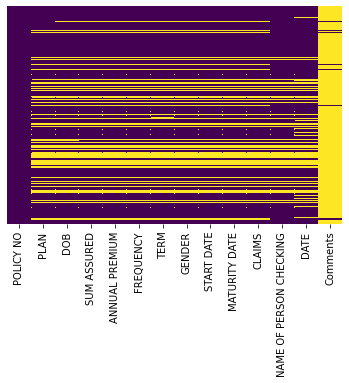

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The **bright streaks** in our **heatmap** indicates **missing data** in our dataset. We will not impute any missing data in this case as we are yet to exhaust all the files with data in our file repository.

The bar **gragh below** still provides a **visual representation** of the missing data with **comments** column having the most missing data.

### plotting a bar gragh to represent missing values

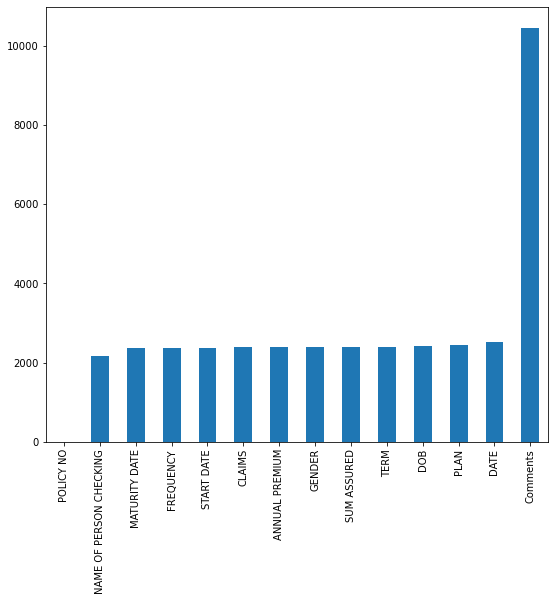

In [17]:
# comment column has the most missing values as shown by the bar gragh
missing=df.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(9,8))
missing.plot.bar()
plt.show()

It's now clear the column **POLICY NO** has no any missing value 

In [18]:
df.fillna('missing')

,POLICY NO,PLAN,DOB,SUM ASSURED,ANNUAL PREMIUM,FREQUENCY,TERM,GENDER,START DATE,MATURITY DATE,CLAIMS,NAME OF PERSON CHECKING,DATE,Comments
0,4004,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Non,Rodgers,5312021,missing
1,4005,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Non,Rodgers,6022021,missing
2,4006,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Non,Rodgers,6022021,missing
3,4014,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Non,Rodgers,6022021,missing
4,4016,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,Rodgers,6032021,NOT SCANNED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10697,1213969,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,Rodgers,6032021,NOT SCANNED
10698,1011466,missing,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Non,Anrdrew,6022021,missing
10699,2039583,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Non,Andrew,6022021,missing
10700,1215276,missing,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Non,Rodgers,6032021,missing


In [19]:
df_1=df.copy()

Let's do away with all the **trailing spaces** in our **NAME OF PERSON CHECKING** column data. This where much of editing was done.

In [20]:
df['NAME OF PERSON CHECKING'].unique()

array(['Rodgers', 'Daniel Masibo', 'christine', 'Daniel Masibo ',
       'lairus', 'Joseph', nan, 51552, ')lairus', 51975, 51985,
       'christine ', 'Not Scanned', 'chrstine', 'christtine', 'lairus ',
       'cchristine', 'Surrender', 'Daniel Masibo\t6052021', 'Roders',
       'chrIstine', 'chrisrine', 'laiirus', 'Andrew', 'lairus.', 'lairud',
       ' ', 'lairu', 'Daniel Masibo        ', 2039518, 2036984, 'Lairus',
       20011667, 'Rodgers ', 'Anrdrew'], dtype=object)

**Let's further clean our data**

Let's correct the typos created while editing names of the data by data checkers in **NAME OF PERSON CHECKING** column.

In [21]:
df_1['NAME OF PERSON CHECKING']= df_1['NAME OF PERSON CHECKING'].replace(['lairu','laiirus','lairud','Lairus','lairus ','lairus.',')lairus'],'lairus')
df_1['NAME OF PERSON CHECKING']= df_1['NAME OF PERSON CHECKING'].replace(['christine ','chrisrine','christtine','chrIstine','chrstine','cchristine'],'christine')
df_1['NAME OF PERSON CHECKING']= df_1['NAME OF PERSON CHECKING'].replace(['Rodgers ','Roders'],'Rodgers')
df_1['NAME OF PERSON CHECKING']= df_1['NAME OF PERSON CHECKING'].replace(['Daniel Masibo\t6052021','Daniel Masibo ',20011667,'Not Scanned',51975,51985,51552,2036984,'Surrender',2039518],'DanielMasibo')

Strip **Leading**, **Trailing Space** and **all spaces**(white)of the column in pandas:

In [22]:
df_1['NAME OF PERSON CHECKING']=df_1['NAME OF PERSON CHECKING'].str.strip() #Strip Leading, Trailing Space
df_1['NAME OF PERSON CHECKING'] =df_1['NAME OF PERSON CHECKING'].str.replace(" ","") #strip all spaces(white)

In [23]:
df_1['NAME OF PERSON CHECKING'].value_counts()

christine       2809
lairus          2235
DanielMasibo    1732
Rodgers         1683
Joseph            59
Andrew            22
                   4
Anrdrew            1
Name: NAME OF PERSON CHECKING, dtype: int64

Let's handle all the **leading**,**trailing**, and **all spaces**(white) from the **DATE** column

In [24]:
df_1['DATE']=df_1['DATE'].str.strip() #Strip Leading, Trailing Space
df_1['DATE']=df_1['DATE'].str.replace(" ","") ##strip all spaces(white)

**Individual work for the project period**

Some work haven't been incorporated in the main file. This work therfore is provisional.

In [25]:
Daniel=df_1[df_1['NAME OF PERSON CHECKING']=='DanielMasibo']
christine=df_1[df_1['NAME OF PERSON CHECKING']=='christine']
Rodgers=df_1[df_1['NAME OF PERSON CHECKING']=='Rodgers']
Lairus=df_1[df_1['NAME OF PERSON CHECKING']=='lairus']
Andrew=df_1[df_1['NAME OF PERSON CHECKING']=='Andrew']
Joseph=df_1[df_1['NAME OF PERSON CHECKING']=='Joseph']
print("Daniel's total files done:",len(Daniel))
print("christine's total files done:",len(christine))
print("Lairus's total files done:",len(Lairus))
print("Rodgers's total files done:",len(Rodgers))
print("Andrew's total files done:",len(Andrew))
print("Joseph's total files done:",len(Joseph))

Daniel's total files done: 1732
christine's total files done: 2809
Lairus's total files done: 2235
Rodgers's total files done: 1683
Andrew's total files done: 22
Joseph's total files done: 59


saving Daniel's work for the **whole project period**. This excludes other files yet to be incorporated in the parent file**(sheet2)**

In [26]:
Daniel.to_excel('Daniel_total_1.xlsx') 

**Total Number of physical files done on Friday, 11-06-2021**

An excercise carried out to capture files regarded as missing.

In [27]:
filter=df[df['DATE']==6112021]
print(len(filter))
df[df['DATE']==6112021]

385


,POLICY NO,PLAN,DOB,SUM ASSURED,ANNUAL PREMIUM,FREQUENCY,TERM,GENDER,START DATE,MATURITY DATE,CLAIMS,NAME OF PERSON CHECKING,DATE,Comments
2277,71581,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Not Ok,Not Ok,Non,lairus,6112021,NaN
2285,7159,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Non,lairus,6112021,NaN
2398,7191,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Non,lairus,6112021,NaN
2399,7194,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Non,lairus,6112021,NaN
2402,7215,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Not Ok,Not Ok,Non,lairus,6112021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2031309,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Non,Daniel Masibo,6112021,NaN
8554,2035462,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Maturity,Daniel Masibo,6112021,NaN
8595,2035770,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Loan,Rodgers,6112021,NaN
8853,2036415,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Non,Rodgers,6112021,NaN


### Saving the file back to the directory in a format (excel) that is user friendly

In [28]:
df[df['DATE']==6112021].to_excel('Friday 11-06-2021 task.xlsx')

By: *Daniel Masibo*